In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("covid_19_data.csv")

In [3]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [4]:
data.shape

(321, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [6]:
data.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [7]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

<AxesSubplot:>

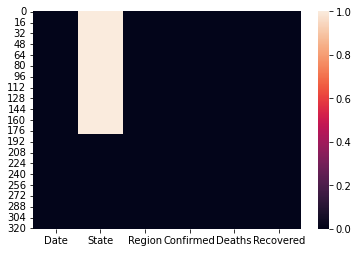

In [8]:
sns.heatmap(data.isnull())

In [9]:
data["State"].unique()

array([nan, 'Alabama', 'Alaska', 'Alberta', 'Anguilla', 'Anhui',
       'Arizona', 'Arkansas', 'Aruba', 'Australian Capital Territory',
       'Beijing', 'Bermuda', 'Bonaire, Sint Eustatius and Saba',
       'British Columbia', 'British Virgin Islands', 'California',
       'Cayman Islands', 'Channel Islands', 'Chongqing', 'Colorado',
       'Connecticut', 'Curacao', 'Delaware',
       'Diamond Princess cruise ship', 'District of Columbia',
       'Falkland Islands (Malvinas)', 'Faroe Islands', 'Florida',
       'French Guiana', 'French Polynesia', 'Fujian', 'Gansu', 'Georgia',
       'Gibraltar', 'Grand Princess', 'Greenland', 'Guadeloupe', 'Guam',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hawaii', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Idaho',
       'Illinois', 'Indiana', 'Inner Mongolia', 'Iowa', 'Isle of Man',
       'Jiangsu', 'Jiangxi', 'Jilin', 'Kansas', 'Kentucky', 'Liaoning',
       'Louisiana', 'Macau', 'Maine', 'Manitoba', 'Marti

In [10]:
data["Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Chile', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 

In [11]:
data.groupby("Region").sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [12]:
data.groupby("Region")["Confirmed"].sum().sort_values(ascending=False).head(20)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

In [13]:
data.groupby("Region")["Confirmed","Recovered"].sum()

C:\Temp\ipykernel_3876\3558050909.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby("Region")["Confirmed","Recovered"].sum()


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


In [14]:
data[data["Confirmed"]<10]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [15]:
# removing all the columns where confirm column is less than 10
data = data[~(data["Confirmed"]<10)]

In [16]:
data.sample(10)

,Date,State,Region,Confirmed,Deaths,Recovered
121,4/29/2020,NaN,North Macedonia,1442,73,627
196,4/29/2020,Cayman Islands,UK,73,1,10
147,4/29/2020,NaN,Slovakia,1391,22,484
292,4/29/2020,Shandong,Mainland China,787,7,772
254,4/29/2020,Missouri,US,7660,338,0
144,4/29/2020,NaN,Seychelles,11,0,6
7,4/29/2020,NaN,Armenia,1932,30,900
36,4/29/2020,NaN,Congo (Kinshasa),491,30,59
37,4/29/2020,NaN,Costa Rica,713,6,323
22,4/29/2020,NaN,Brazil,79685,5513,34132


In [17]:
# in which region , minimum confirm cases are recored 
data.groupby("Region")["Confirmed"].sum().sort_values(ascending=True).head(20)

Region
Suriname                            10
Gambia                              10
Holy See                            10
Burundi                             11
Seychelles                          11
Nicaragua                           13
Saint Kitts and Nevis               15
Dominica                            16
Namibia                             16
Saint Vincent and the Grenadines    16
Saint Lucia                         17
Fiji                                18
Belize                              18
Laos                                19
Grenada                             20
Botswana                            23
Antigua and Barbuda                 24
Timor-Leste                         24
Angola                              27
Zimbabwe                            32
Name: Confirmed, dtype: int64

In [18]:
data[data["Region"] == "Suriname"]

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8


In [19]:
# in which region , max confirm cases are recored 
data.groupby("Region").Confirmed.sum().sort_values(ascending=False).head(20)

Region
US                1039909
Spain              236899
Italy              203591
France             166536
UK                 166432
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82861
Brazil              79685
Canada              52860
Belgium             47859
Netherlands         38993
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

In [20]:
data[data["Region"] == "US"]

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
186,4/29/2020,Arizona,US,7209,308,0
187,4/29/2020,Arkansas,US,3193,57,0
195,4/29/2020,California,US,48747,1946,0
199,4/29/2020,Colorado,US,14758,766,0
200,4/29/2020,Connecticut,US,26767,2169,0
202,4/29/2020,Delaware,US,4655,144,0
204,4/29/2020,Diamond Princess cruise ship,US,49,0,0
205,4/29/2020,District of Columbia,US,4106,205,0


In [21]:
# in which region where the minimum deaths are recorded
data.groupby("Region")["Deaths"].sum().sort_values(ascending=True).head(30)

Region
Cambodia                            0
Seychelles                          0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
South Sudan                         0
Rwanda                              0
Grenada                             0
Macau                               0
Madagascar                          0
Nepal                               0
Namibia                             0
Saint Vincent and the Grenadines    0
Mozambique                          0
Holy See                            0
Timor-Leste                         0
Mongolia                            0
Uganda                              0
Laos                                0
Eritrea                             0
Vietnam                             0
Fiji                                0
Dominica                            0
Gambia                              1
Equatorial Guinea                   1
Eswatini                            1
Cabo 

In [22]:
# in which region where the minimum deaths are recorded
data.groupby("Region")["Deaths"].sum().sort_values(ascending=False).head(10)

Region
US             60967
Italy          27682
UK             26165
Spain          24275
France         24121
Belgium         7501
Germany         6467
Iran            5957
Brazil          5513
Netherlands     4727
Name: Deaths, dtype: int64

In [23]:
# how many confirm cases are recorded in india
data[data["Region"]=="India"]

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


In [24]:
data["month"] = data["Date"].str.split("/").str[0]
data["day"] = data["Date"].str.split("/").str[1]
data["year"] = data["Date"].str.split("/").str[2]

In [25]:
data.head(3)

,Date,State,Region,Confirmed,Deaths,Recovered,month,day,year
0,4/29/2020,NaN,Afghanistan,1939,60,252,4,29,2020
1,4/29/2020,NaN,Albania,766,30,455,4,29,2020
2,4/29/2020,NaN,Algeria,3848,444,1702,4,29,2020


In [26]:
data.drop(["Date", "State"], axis=1 , inplace=True)

In [27]:
data.head(3)

,Region,Confirmed,Deaths,Recovered,month,day,year
0,Afghanistan,1939,60,252,4,29,2020
1,Albania,766,30,455,4,29,2020
2,Algeria,3848,444,1702,4,29,2020


In [30]:
le = LabelEncoder()
data["Region"] = le.fit_transform(data["Region"])

In [31]:
data.head()

,Region,Confirmed,Deaths,Recovered,month,day,year
0,0,1939,60,252,4,29,2020
1,1,766,30,455,4,29,2020
2,2,3848,444,1702,4,29,2020
3,3,743,42,423,4,29,2020
4,4,27,2,7,4,29,2020


In [32]:
data["Region"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 101, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 169,  31, 102,   8,  73, 100])